<a href="https://colab.research.google.com/github/F1ameX/Modern-Methods-of-Deep-Machine-Learning/blob/main/1_polynominal_regression/1_polynominal_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import math
import numpy as np
import scipy as sp
import pandas as pd
from matplotlib import pyplot as plt

In [11]:
N = 250 # size of sample
sample = np.empty((N, 2), dtype = float)
epsilons = [0.001, 0.1, 1, 1.5] # epsilon variability
rng = np.random.default_rng() # random generator
a, b, c, d = rng.uniform(low = -3.0, high = 3.0, size = 4) # random coefficient

In [7]:
def f(x : float, option : int = 1):
  global a, b, c, d

  if option == 0:
    return a * np.pow(x, 3) + b * np.pow(x, 2) + c * x + d

  elif option == 1:
    return x * np.sin(2 * np.pi * x)

In [15]:
def draw_graph(title : str, X : np.array, y_original : np.array, y_noised : np.array) -> None:
    plt.figure(figsize = (9, 4.5))
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xlim(-1, 1)
    plt.ylim(-3, 3)
    plt.scatter(X, y_noised, c = 'red', linewidths = 0.25, alpha = 0.75, label = 'Функция с ошибкой')
    plt.scatter(X, y_original, c = 'blue', linewidths = 0.25, label = 'Исходная функция')
    plt.grid(True)
    plt.legend()
    plt.show()

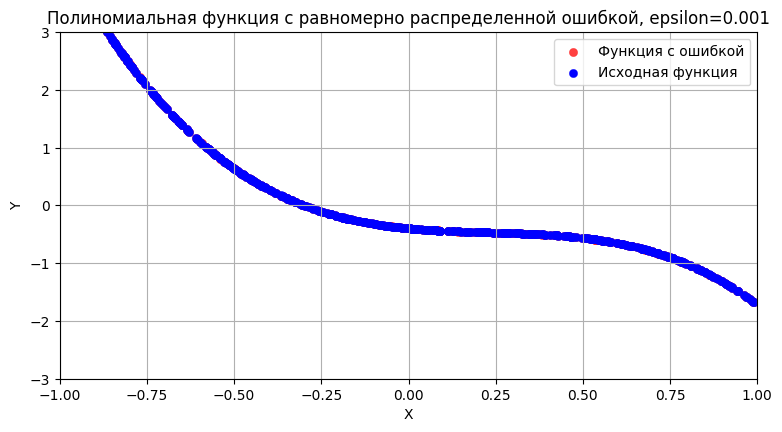

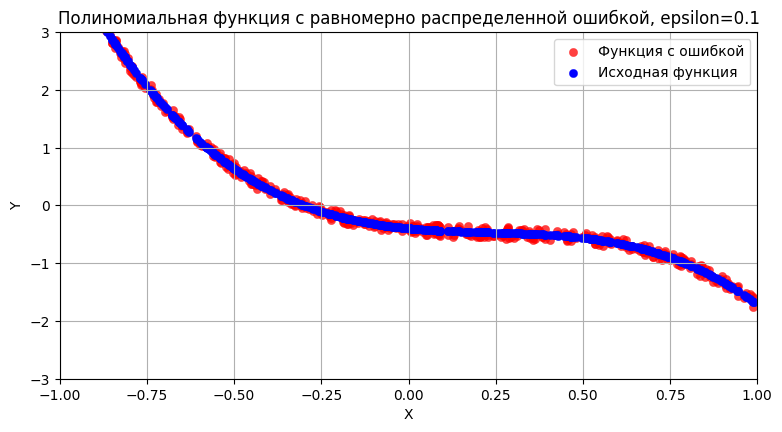

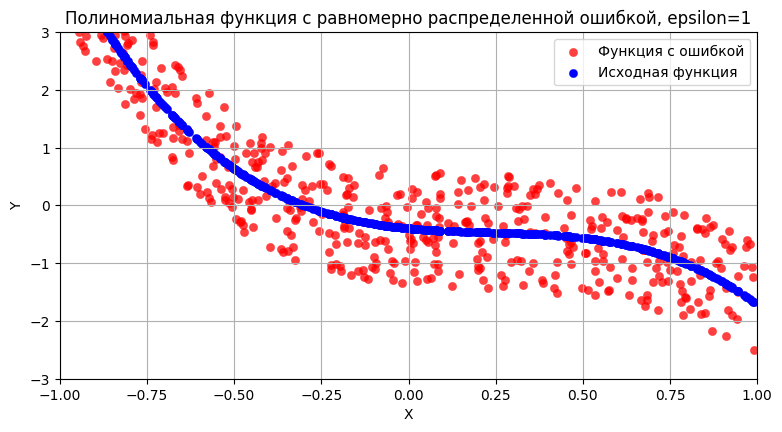

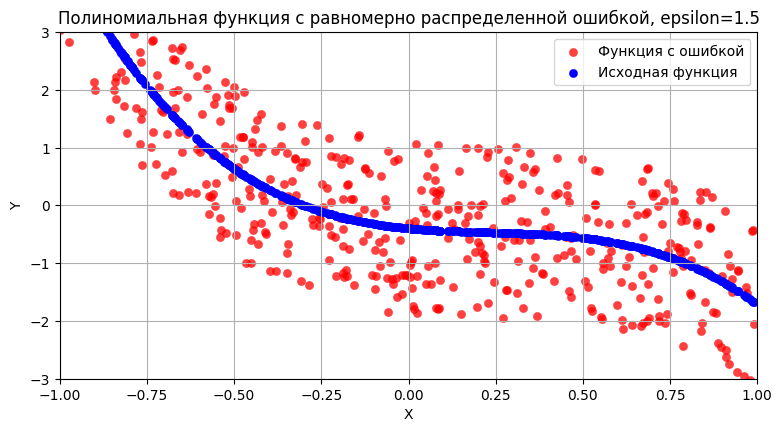

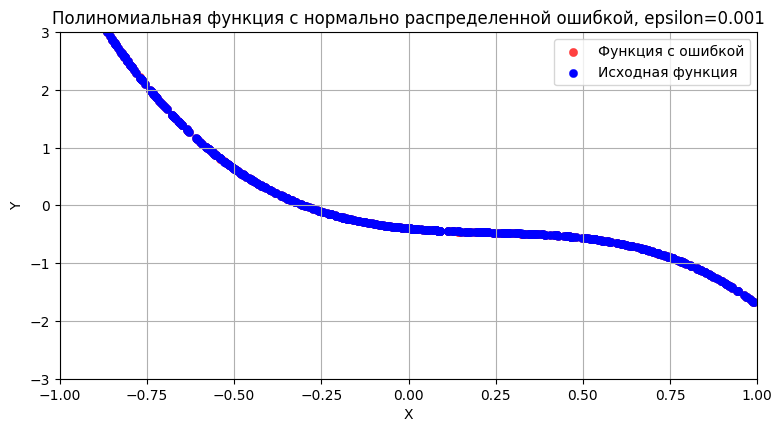

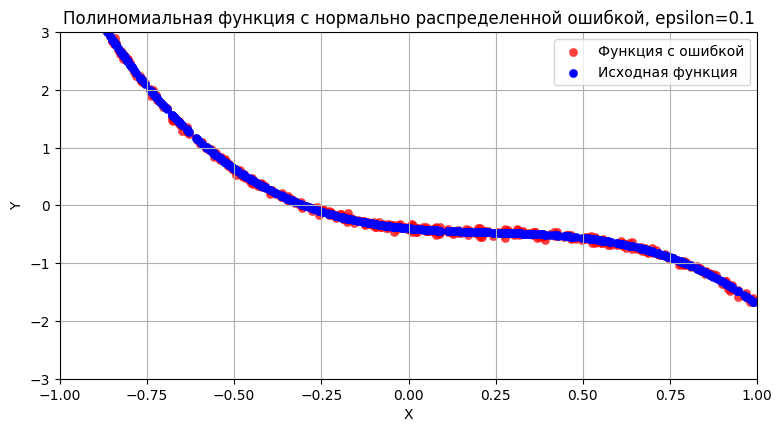

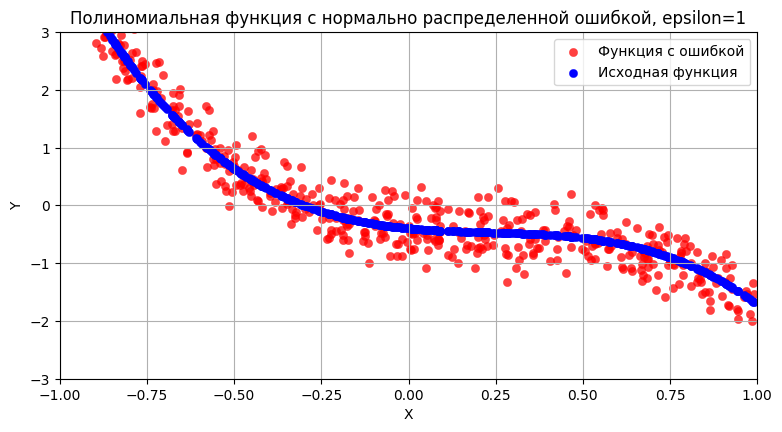

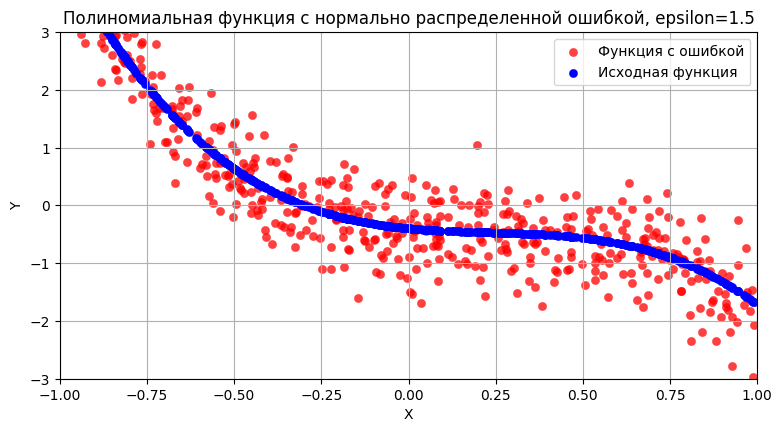

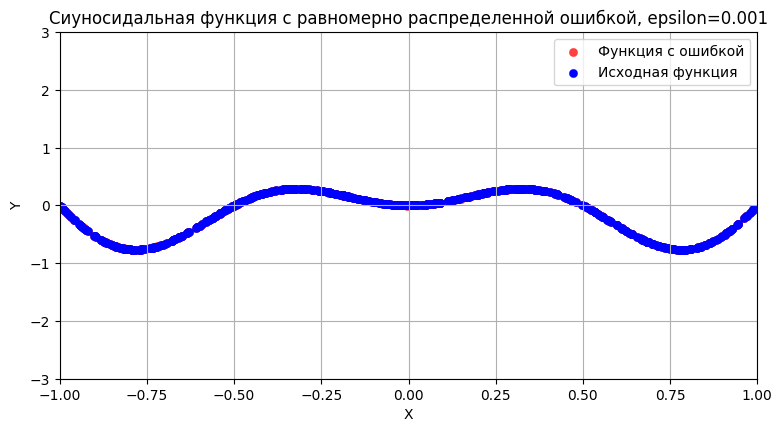

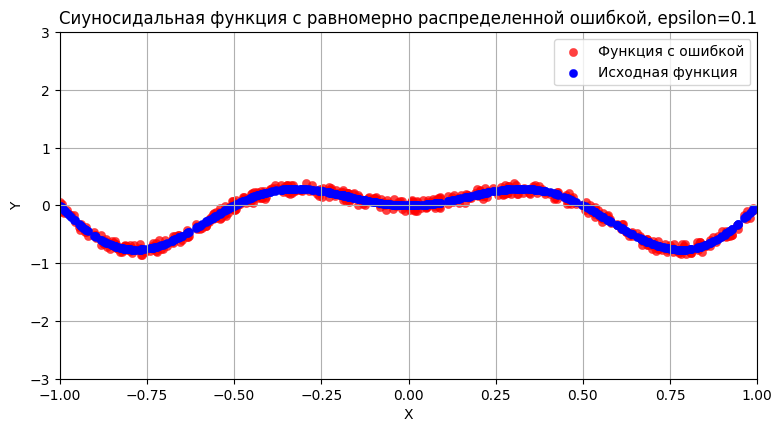

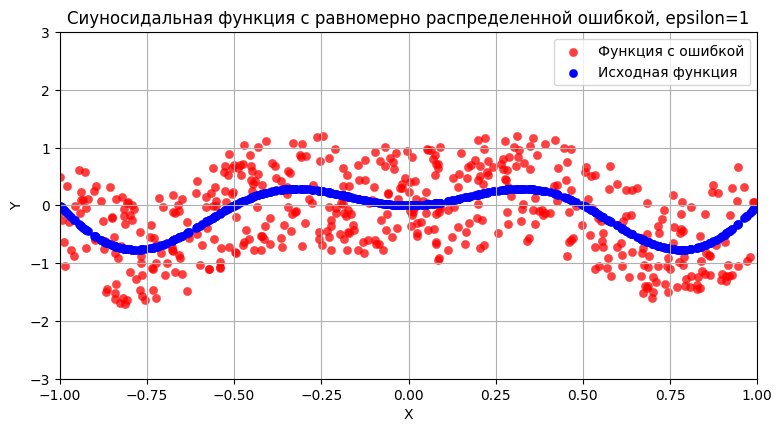

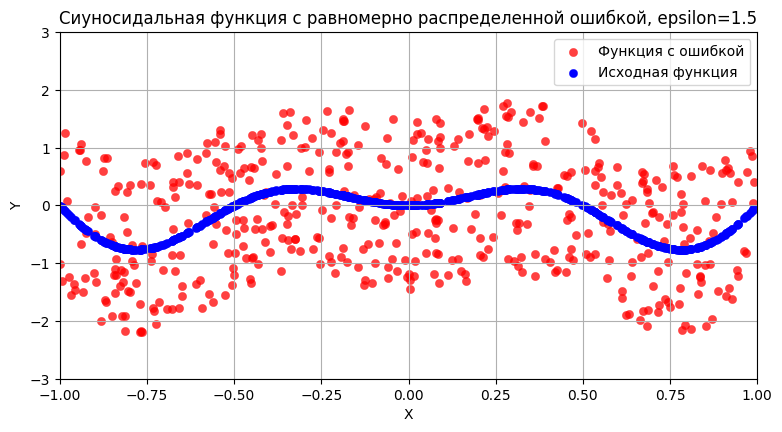

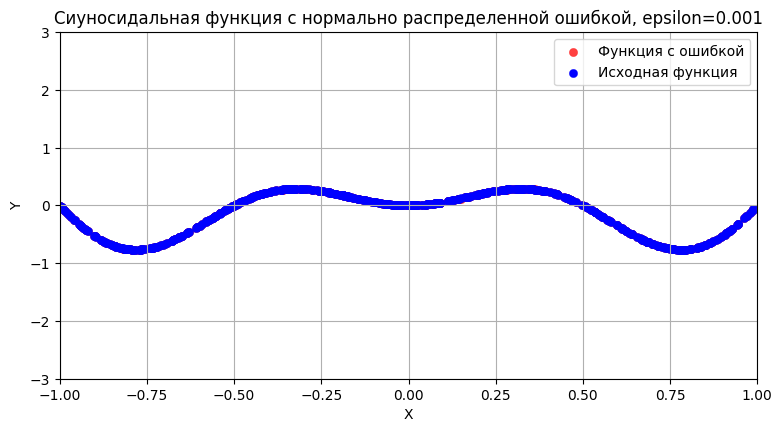

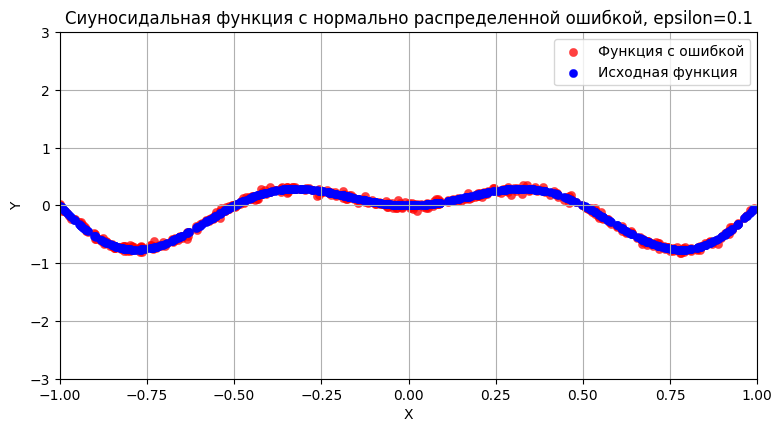

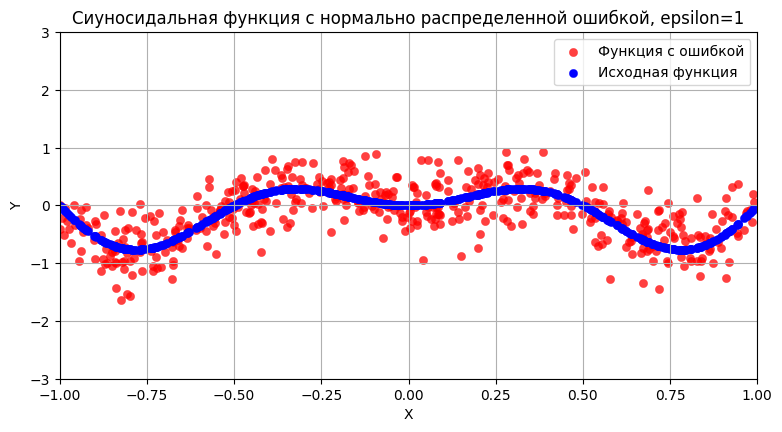

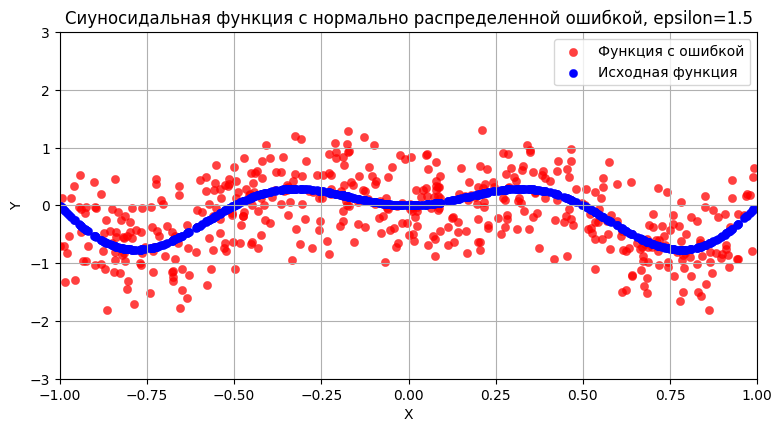

In [8]:
for i in range(N):
    sample[i][0] = rng.uniform(low = -1.0, high = 1.0)

for func in range(2):
    clear = f(sample[:, 0], option = func)
    for distribution in range(2):
        for eps in epsilons:
            for i in range(N):

                if distribution == 0:
                    sample[i][1] = f(sample[i][0], option = func) + rng.uniform(low = -eps, high = eps)
                else:
                    sample[i][1] = f(sample[i][0], option = func) + np.clip(rng.normal(loc = 0.0, scale = eps / 3), -eps, eps)

            if func == 0:
                title = 'Полиномиальная функция'
            if func == 1:
                title = 'Сиуносидальная функция'

            if distribution == 0:
                title += ' с равномерно распределенной ошибкой, '
            if distribution == 1:
                title += ' с нормально распределенной ошибкой, '

            title += f"epsilon={eps}"
            draw_graph(title, sample[:, 0], clear, sample[:, 1])

In [4]:
class PolynominalRegression():
    def __init__(self, degree : int) -> None:
        self.degree = degree
        self.weights = None

    def _design_matrix(self, X: np.ndarray) -> np.ndarray:
        X = X.reshape(-1, 1)
        return np.hstack([X**i for i in range(self.degree + 1)])

    def _loss(self, y_true: np.ndarray, y_pred: np.ndarray) -> float:
        y_true = y_true.reshape(-1, 1)
        y_pred = y_pred.reshape(-1, 1)
        return np.mean((y_true - y_pred) ** 2)

    def fit(self, X: np.ndarray, y: np.ndarray, ridge_alpha: float = 0.0):
        X_poly = self._design_matrix(X)
        y = y.reshape(-1, 1)

        if ridge_alpha == 0.0:
            self.weights, *_ = np.linalg.lstsq(X_poly, y, rcond=None)
        else:
            I = np.eye(X_poly.shape[1])
            self.weights = np.linalg.solve(X_poly.T @ X_poly + ridge_alpha * I, X_poly.T @ y)

        return self


    def predict(self, X: np.array) -> np.array:
        if self.weights is not None:
            X_poly = self._design_matrix(X)
            return (X_poly @ self.weights).ravel()

In [37]:
def split_data(X: np.array, y: np.array, ratio: float = 0.33, random_state: int = 42):
    rng = np.random.default_rng(seed=random_state)
    idx = np.arange(X.shape[0])
    rng.shuffle(idx)
    left_share = int((1 - ratio) * X.shape[0])

    train_idx = idx[:left_share]
    test_idx  = idx[left_share:]

    return train_idx, test_idx

## Fitting

In [45]:
X = np.empty(N, dtype=float)
y_true = np.empty(N, dtype=float)

for i in range(N):
    X[i] = rng.uniform(-1.0, 1.0)
    y_true[i] = f(X[i], option=1)

epsilon = 0.5
y_noised = y_true + rng.normal(0.0, epsilon, size=N)

train_idx, test_idx = split_data(X, y_true, ratio=0.6, random_state=42)

X_train, X_test = X[train_idx], X[test_idx]

y_train = y_noised[train_idx]
y_test  = y_true[test_idx]

results = []
for m in range(21):
    model = PolynominalRegression(degree = m)
    model.fit(X_train, y_train)

    MSE_train = model._loss(y_train, model.predict(X_train))
    MSE_test  = model._loss(y_test,  model.predict(X_test))

    results.append({'Степень полинома' : m, 'MSE на обучающей выборке' : MSE_train, 'MSE на тестовой выборке' : MSE_test})

pd.DataFrame(results).set_index('Степень полинома')

,MSE на обучающей выборке,MSE на тестовой выборке
Степень полинома,,
0,0.335314,0.142364
1,0.320243,0.148174
2,0.264189,0.065296
3,0.263264,0.065049
4,0.243572,0.047457
5,0.243084,0.049642
6,0.189716,0.019467
7,0.188627,0.021222
8,0.188506,0.019126


In [48]:
def draw_poly(title, X_train, y_train, model, f, xlim=(-1, 1), ylim=(-3, 3)):
    X_grid = np.linspace(xlim[0], xlim[1], 600)
    y_true = f(X_grid)
    y_pred = model.predict(X_grid)

    plt.figure(figsize=(9, 4.5))
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.xlim(*xlim)
    plt.ylim(*ylim)

    plt.scatter(X_train, y_train, s=12, alpha=0.35, label="Train (с шумом)")
    plt.plot(X_grid, y_true, linewidth=2, label="Исходная функция (без шума)")
    plt.plot(X_grid, y_pred, linewidth=2, label="Полиномиальная регрессия")

    plt.grid(True)
    plt.legend()
    plt.show()

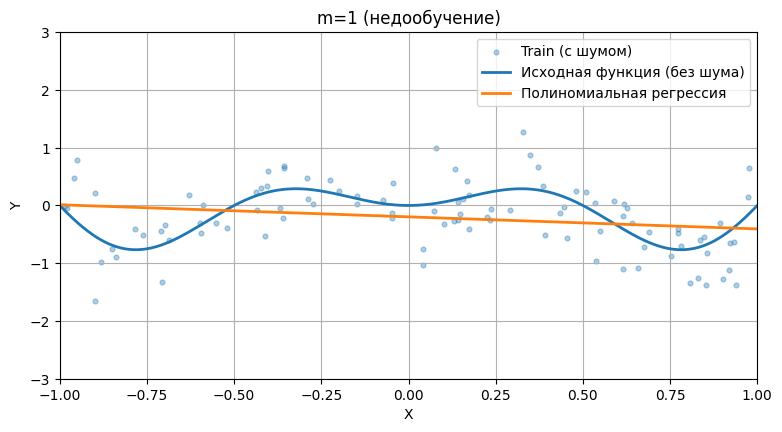

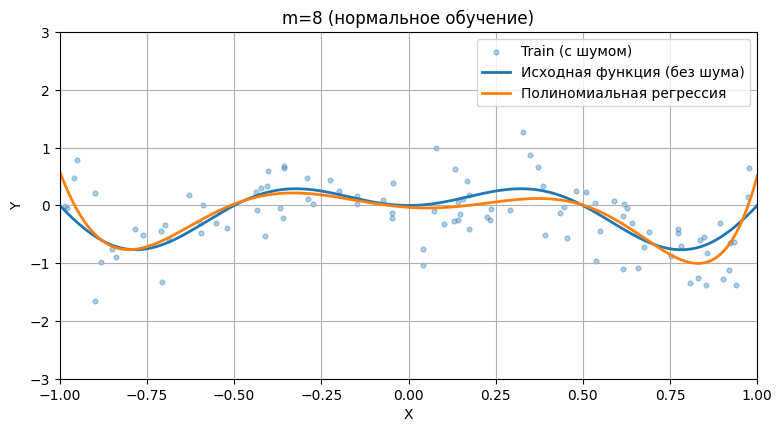

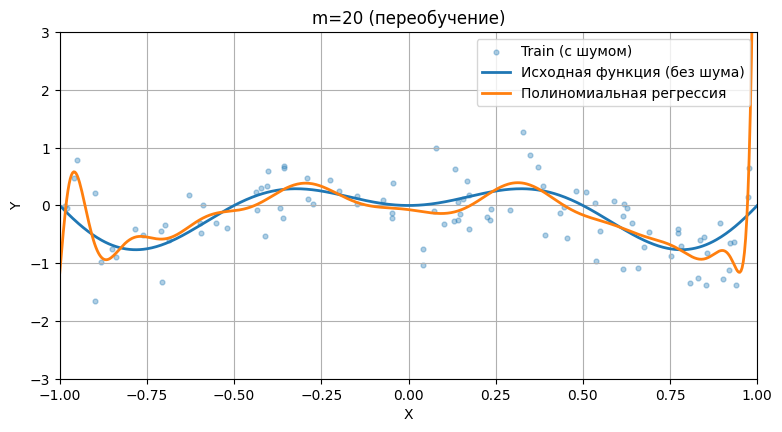

In [49]:
underfit_model = PolynominalRegression(degree = 1)
underfit_model.fit(X_train, y_train)

overfit_model = PolynominalRegression(degree = 20)
overfit_model.fit(X_train, y_train)

normal_model = PolynominalRegression(degree = 8)
normal_model.fit(X_train, y_train)

draw_poly("m=1 (недообучение)", X_train, y_train, underfit_model, f)
draw_poly("m=8 (нормальное обучение)", X_train, y_train, normal_model, f)
draw_poly("m=20 (переобучение)", X_train, y_train, overfit_model, f)